# Fourier Ptychography Recovery

This notebook is used to analyze the results of the simulation and recovery tools provided by this library.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

from leb.freeze import PupilRecoveryMethod, fp_recover, fp_simulation

## Simulate a dataset and ground truth object and pupil

The object is the complex object from which the simulated images are generated, i.e. it has a complex datatype (amplitude and phase).

In [2]:
# Simulate a FP dataset with a pupil aberrated with Zernike polynomials from the first six Noll indexes
zernike_coeffs = [0.3, 0.5, 0.3, 0.6, 0.8, 0.3]
dataset, unaberrated_pupil, ground_truth_object, ground_truth_pupil = fp_simulation(
    zernike_coeffs=zernike_coeffs,
    num_leds=(20, 20),
    center_led=(16, 16),
    led_pitch_mm=(4,4),
    axial_offset_mm=-65
)

# Recover the complex object
result, result_pupil = fp_recover(
    dataset=dataset,
    pupil=unaberrated_pupil,
    num_iterations = 50,
    pupil_recovery_method=PupilRecoveryMethod.rPIE,
    show_progress=True,
)

100%|██████████| 50/50 [00:13<00:00,  3.59it/s]


### Ground truth object: amplitude and phase

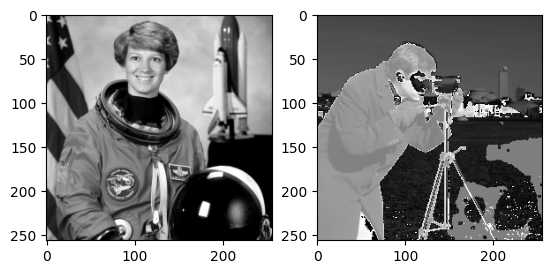

In [3]:
io.imshow_collection([np.abs(ground_truth_object), np.angle(ground_truth_object)], cmap=plt.cm.gray)
io.show()

### Ground truth pupil

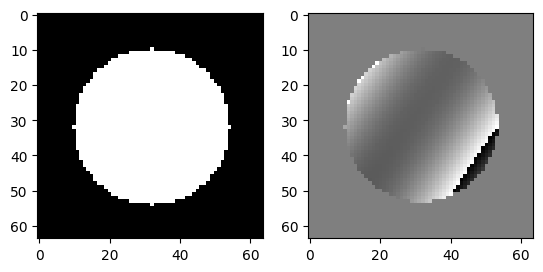

In [4]:
io.imshow_collection([np.abs(ground_truth_pupil.p), np.angle(ground_truth_pupil.p)], cmap=plt.cm.gray)
io.show()


### Simulated images

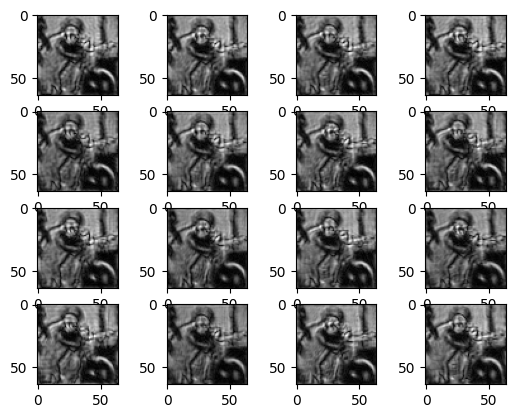

In [5]:
# Simulated images 0 - 15
io.imshow_collection(dataset.images[:16], cmap=plt.cm.gray)
io.show()

## Results

### Object

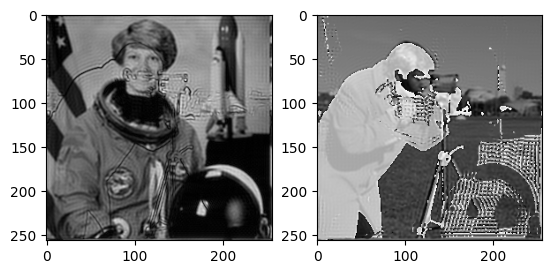

In [6]:
io.imshow_collection([np.abs(result), np.angle(result)], cmap=plt.cm.gray)
io.show()

### Pupil

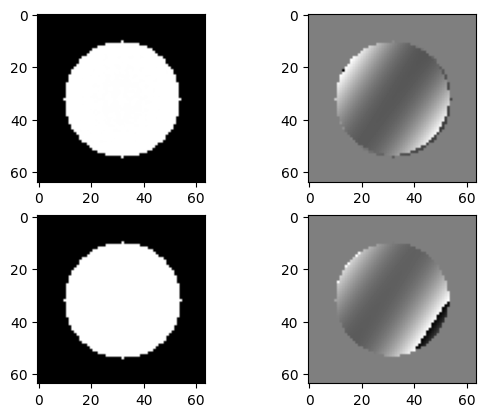

In [7]:
# Recovered / ground truth
io.imshow_collection([np.abs(result_pupil.p), np.angle(result_pupil.p), np.abs(ground_truth_pupil.p), np.angle(ground_truth_pupil.p)], cmap=plt.cm.gray)
io.show()